# Stock Market Price Prediction
## Business Objective:
Predict the apple stock market price for next 30 days. 
There are Open, High, Low and Close price has been given for each day starting from 2012 to 2019 for Apple stock. 
   1. Split the last year into a test set- can you build a model to predict stock price?
   2. Find trends in short term, or long term trends?
   3. Understand how it is impacted from external factors or any big external events?
   4. Forecast for next 30 days.


## 1. Import the Libraries

In [3]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm

from pandas.tseries.holiday import USFederalHolidayCalendar
from pandas.tseries.offsets import CustomBusinessDay

## 2. Import the Dataset 

In [5]:
# Converting Date column to 'Datatime' data type, further making it index column
data = pd.read_csv(r"C:\Users\User\Project-Stock_Price_Prediction-master\Project-Stock_Price_Prediction-master\Dataset\AAPL.csv",parse_dates = ['Date'],index_col = 0)
df_cleaned = pd.read_csv(r"C:\Users\User\Project-Stock_Price_Prediction-master\Project-Stock_Price_Prediction-master\Dataset\AAPL.csv")

data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,58.485714,58.928570,58.428570,58.747143,50.765709,75555200
2012-01-04,58.571430,59.240002,58.468571,59.062859,51.038536,65005500
2012-01-05,59.278572,59.792858,58.952858,59.718571,51.605175,67817400
2012-01-06,59.967144,60.392857,59.888573,60.342857,52.144630,79573200
2012-01-09,60.785713,61.107143,60.192856,60.247143,52.061932,98506100
...,...,...,...,...,...,...
2019-12-23,280.529999,284.250000,280.369995,284.000000,282.054138,24643000
2019-12-24,284.690002,284.890015,282.920013,284.269989,282.322266,12119700
2019-12-26,284.820007,289.980011,284.700012,289.910004,287.923645,23280300


In [6]:
#No.of rows & columns 
data.shape

(2011, 6)

In [7]:
#Checking for null values and data type of columns 
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2011 entries, 2012-01-03 to 2019-12-30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2011 non-null   float64
 1   High       2011 non-null   float64
 2   Low        2011 non-null   float64
 3   Close      2011 non-null   float64
 4   Adj Close  2011 non-null   float64
 5   Volume     2011 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 110.0 KB


In [8]:
# checking for the duplicate values
data.duplicated().sum()

np.int64(0)

In [9]:
# Describing the dataset
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2.011000e+03
mean,126.707469,127.827594,125.580258,126.741235,119.505548,5.949670e+07
std,50.483753,50.926301,50.124940,50.578369,52.438444,4.683856e+07
min,55.424286,57.085712,55.014286,55.790001,48.921928,1.136200e+07
25%,85.882858,86.717858,85.056427,86.202145,75.056679,2.758565e+07
50%,113.050003,114.190002,111.870003,113.050003,105.222908,4.346900e+07
75%,165.190002,167.409996,163.424995,165.245002,160.047111,7.471030e+07
max,291.119995,293.970001,288.119995,291.519989,289.522614,3.765300e+08


In [10]:
#CustomBusinessDay - shows the working days excluding holidays
#USFederalHolidayCalendar - return working days holidays 
us_cal = CustomBusinessDay(calendar=USFederalHolidayCalendar())

In [11]:
# idx1 = pd.Index([2, 1, 3, 4])
# idx2 = pd.Index([3, 4, 5, 6])
# idx1.difference(idx2)
# >>Int64Index([1, 2], dtype='int64')
# idx1.difference(idx2, sort=False)
# >>Int64Index([2, 1], dtype='int64')

my_range = pd.date_range(start='2012-01-03',end='2019-12-30',freq=us_cal) 
print(my_range.difference(data.index))

DatetimeIndex(['2012-04-06', '2012-10-29', '2012-10-30', '2013-03-29',
               '2014-04-18', '2015-04-03', '2016-03-25', '2017-04-14',
               '2018-03-30', '2018-12-05', '2019-04-19'],
              dtype='datetime64[ns]', freq=None)


In [12]:
# deleting extra's dates from 'my range' which are not in actuall dataset 'data'
Cu = CustomBusinessDay(calendar=USFederalHolidayCalendar(),holidays=['2012-04-06', '2012-10-29', '2012-10-30', 
                                                                    '2013-03-29','2014-04-18', '2015-04-03', 
                                                                    '2016-03-25', '2017-04-14', '2018-03-30', 
                                                                    '2018-12-05', '2019-04-19'])
my_range = pd.date_range(start='2012-01-03',end='2019-12-30',freq=Cu)
print(my_range.difference(data.index))

DatetimeIndex([], dtype='datetime64[ns]', freq='C')


In [13]:
#16 values that are going to be ignored
print(data.index.difference(my_range))

DatetimeIndex(['2012-10-08', '2012-11-12', '2013-10-14', '2013-11-11',
               '2014-10-13', '2014-11-11', '2015-10-12', '2015-11-11',
               '2016-10-10', '2016-11-11', '2017-10-09', '2017-11-10',
               '2018-10-08', '2018-11-12', '2019-10-14', '2019-11-11'],
              dtype='datetime64[ns]', freq=None)


In [14]:
#setting dataset frequency 'CustomBusinessDay'(in above cell) 
df = data.asfreq(Cu)
df.shape

(1995, 6)

In [15]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,58.485714,58.928570,58.428570,58.747143,50.765709,75555200
2012-01-04,58.571430,59.240002,58.468571,59.062859,51.038536,65005500
2012-01-05,59.278572,59.792858,58.952858,59.718571,51.605175,67817400
2012-01-06,59.967144,60.392857,59.888573,60.342857,52.144630,79573200
2012-01-09,60.785713,61.107143,60.192856,60.247143,52.061932,98506100
...,...,...,...,...,...,...
2019-12-23,280.529999,284.250000,280.369995,284.000000,282.054138,24643000
2019-12-24,284.690002,284.890015,282.920013,284.269989,282.322266,12119700
2019-12-26,284.820007,289.980011,284.700012,289.910004,287.923645,23280300


In [16]:
#dropping Unnecessary columns
df.drop(['Open','High','Low','Close','Volume'],axis=1,inplace=True)
df.head()

,Adj Close
Date,
2012-01-03,50.765709
2012-01-04,51.038536
2012-01-05,51.605175
2012-01-06,52.144630
2012-01-09,52.061932


In [17]:
#Storing the dataset
df.to_csv('new_Apple_data.csv',index = True)

In [18]:
# make columns of weeks,month and Years
df['Year-Week'] =df.index.strftime('%Y-%U')
df['Month'] = df.index.strftime('%Y-%m')
df['Year'] = df.index.strftime('%Y')
df["month"] =df.index.strftime("%b") 
df['Qtr'] = pd.to_datetime(df['Month'].values, format='%Y-%m').astype('period[Q]')

In [19]:
df.Year.value_counts()

Year
2013    250
2014    250
2015    250
2016    250
2018    249
2017    249
2019    249
2012    248
Name: count, dtype: int64

## 3. Visualization

In [21]:
# Yearly chart
fig,ax=plt.subplots(figsize=(14,6))
plt.plot(df['Adj Close'],color = 'purple')
plt.xlabel('Years')
plt.ylabel('Adj Close')

Text(0, 0.5, 'Adj Close')

In [22]:
sns.distplot(df['Adj Close'],kde=True)

<Axes: xlabel='Adj Close', ylabel='Adj Close'>

## 4.Time Series Component

In [24]:
from pylab import rcParams
rcParams['figure.figsize'] = 20, 10
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose

In [25]:
# Aggregating the Time Series to a monthly scaled index
# y = df[['Date','Adj Close']].copy()
# y.set_index('Date', inplace=True)
# y.index = pd.to_datetime(y.index)
y = df['Adj Close'].resample('1M').mean()

# Setting rcparams
rcParams['figure.figsize'] = 12, 8
rcParams['axes.labelsize'] = 15
rcParams['ytick.labelsize'] = 16
rcParams['xtick.labelsize'] = 6

# Using statistical tools of statsmodel library
decomposition = sm.tsa.seasonal_decompose(y, model='multiplicative')
decomp = decomposition.plot()
decomp.suptitle('Adj Close decomposition', fontsize=22)

Text(0.5, 0.98, 'Adj Close decomposition')

From the above plot we can see that, the trend component is upward trend that means that closeing price is maximum in every year.

We can see that the seasonal component changes slowly over time & we can see there is repeating patterns so we can say that seasonality is present on our data.


### 4.1 Seasonal Subseries Plot 

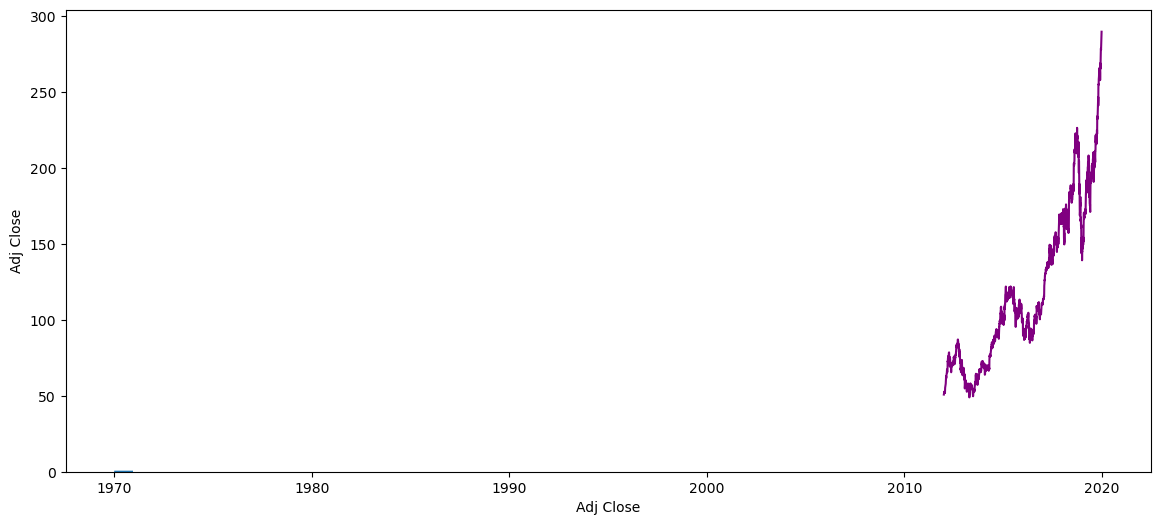

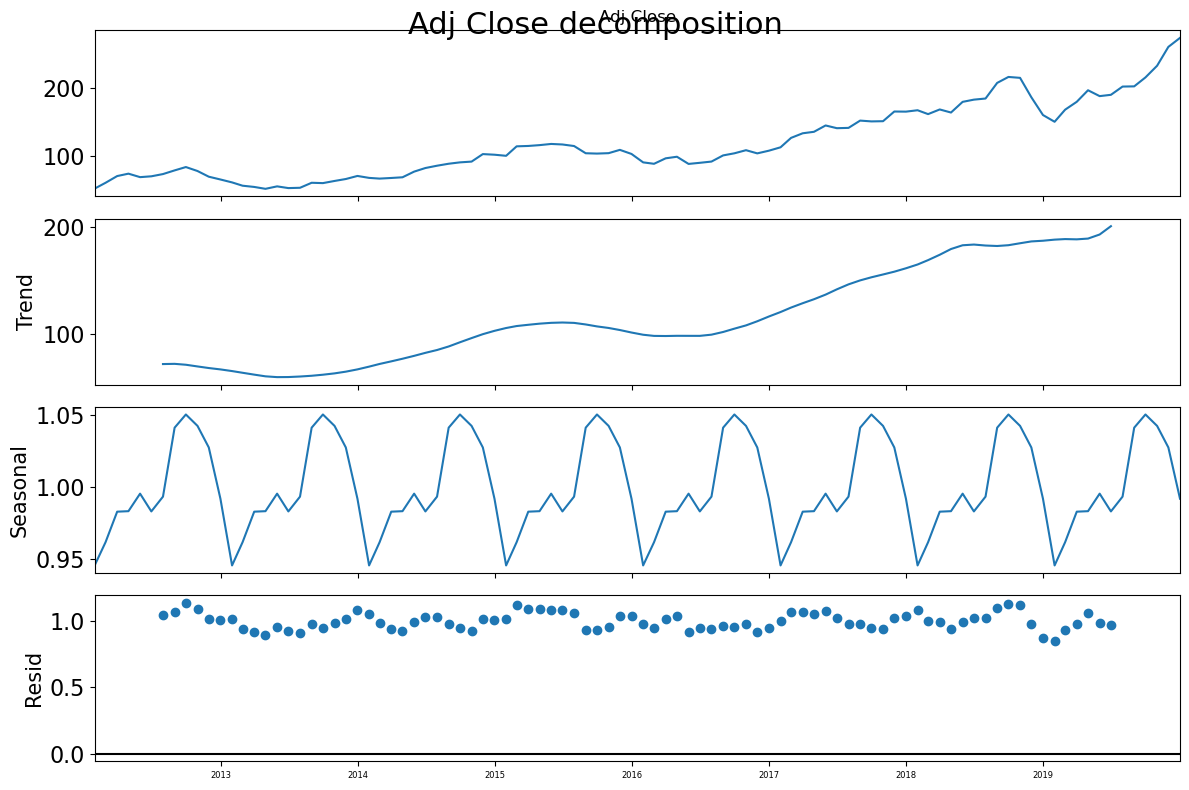

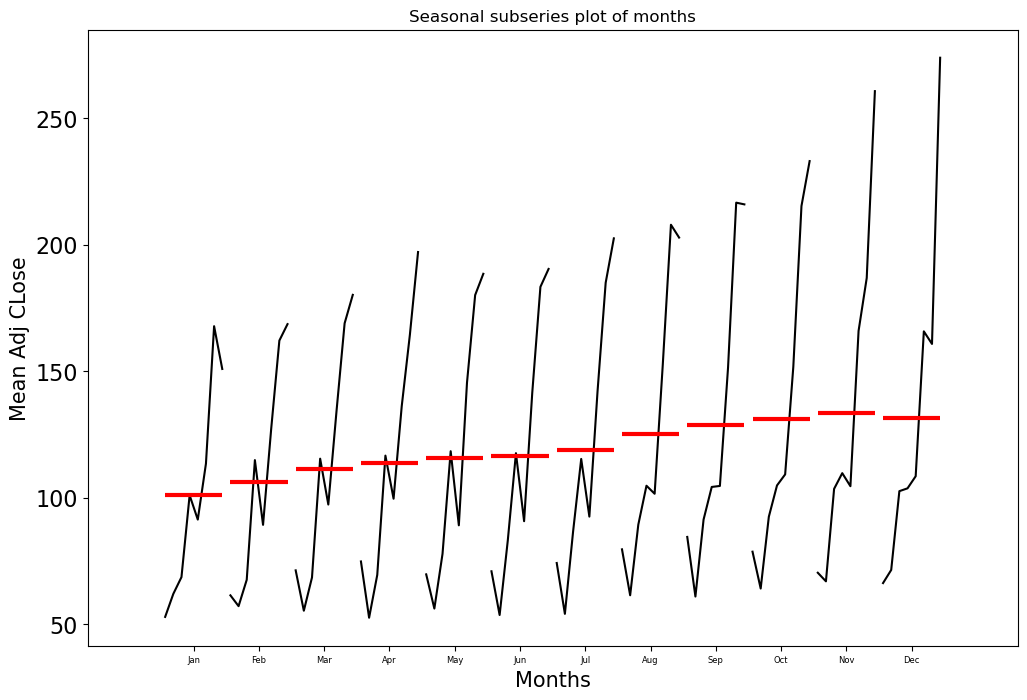

In [28]:
from statsmodels.graphics.tsaplots import quarter_plot,month_plot
month_plot(df['Adj Close'].resample('1M').mean())
plt.title('Seasonal subseries plot of months')
plt.xlabel('Months')
plt.ylabel('Mean Adj CLose')
plt.show()

In above Monthly chart we can see that there is no Monthly Seasonality

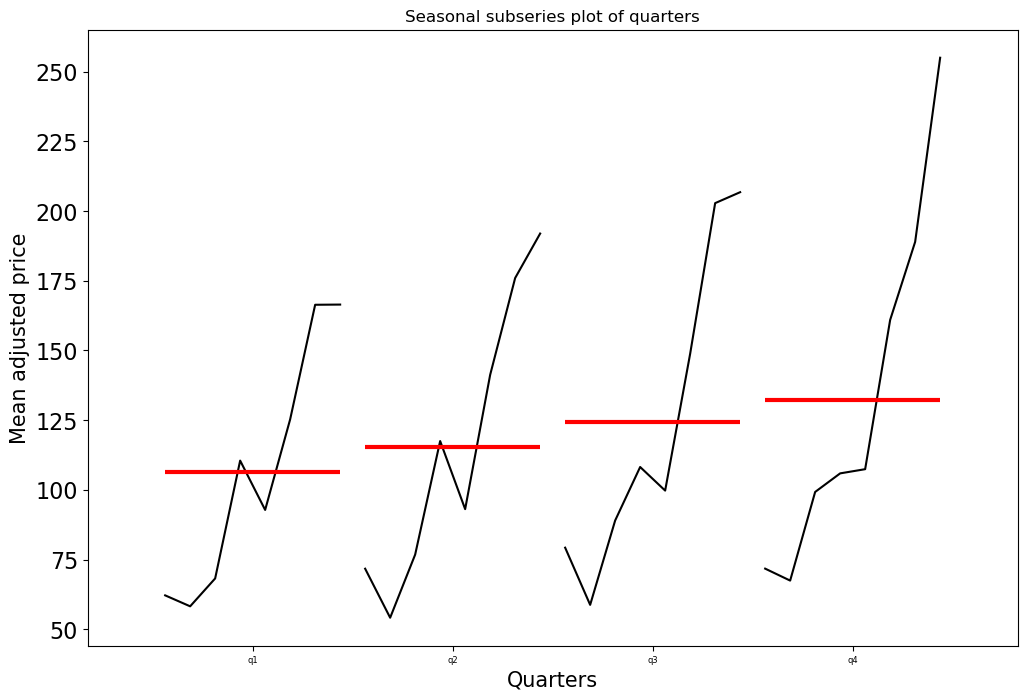

In [30]:
quarter_plot(df['Adj Close'].resample('Q').mean())
plt.title('Seasonal subseries plot of quarters')
plt.xlabel('Quarters')
plt.ylabel('Mean adjusted price')
plt.show()

Here we can se that Data has Quarterly Seasonality

## 5. Testing For Stationarity

In [33]:
from statsmodels.tsa.stattools import adfuller

In [34]:
# test_result=adfuller(df['Adj Close'])
# test_result

In [35]:
def adf_test(series, title=''):
    
    # .dropna() handles differenced data
    result = adfuller(series.dropna(),autolag='AIC') 
    
    print('Agumented Dicky-Fuller test')
    labels = ['ADF test statistic :','p-value :','No. of Lags :']
    out = pd.Series(result[0:3],index=labels)

    for key,val in result[4].items():
        out['critical value ({}) :'.format(key)]=val
        
    # .to_string() removes the line "dtype: float64"
    print(out.to_string())          
    
    if result[1] <= 0.05:
        print("\nReject the null hypothesis")
        print("Data is stationary")
    else:
        print("\nFail to reject the null hypothesis")
        print("Data is non-stationary")

In [36]:
adf_test(df['Adj Close'],title='')

Agumented Dicky-Fuller test
ADF test statistic :       1.252371
p-value :                  0.996328
No. of Lags :             17.000000
critical value (1%) :     -3.433662
critical value (5%) :     -2.863003
critical value (10%) :    -2.567549

Fail to reject the null hypothesis
Data is non-stationary


The test statistic is more than the critical values.
The p value is greater than 0.05,
 that's why we failed to reject null hypothesis

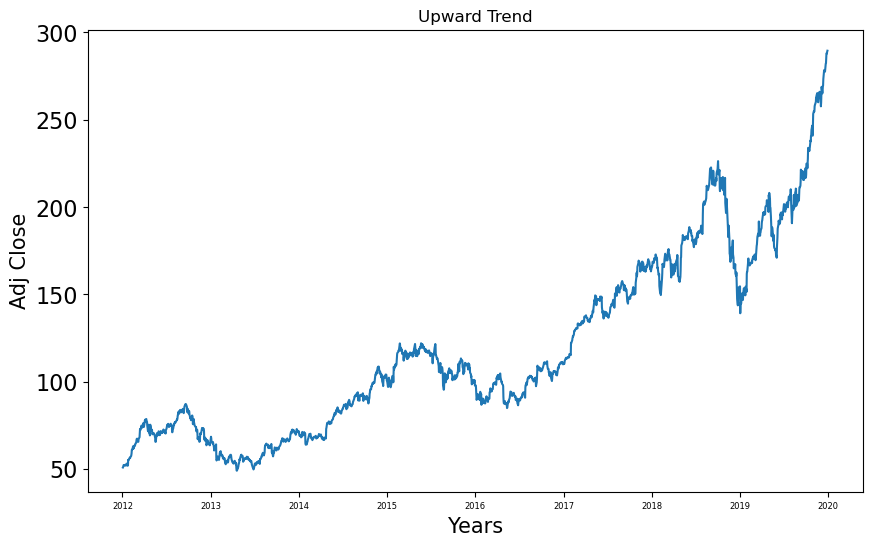

In [38]:
plt.figure(figsize=(10, 6))
plt.plot(df['Adj Close'])
plt.xlabel('Years')
plt.ylabel('Adj Close')
plt.title('Upward Trend')
plt.show()

In [39]:
# Differencing y(t)=y(t)-y(t-1)
df[' Adj Close First Difference'] = df['Adj Close'] -df['Adj Close'].shift(1)

In [40]:
# After differencing ADF test
adf_test(df[' Adj Close First Difference'].dropna())

Agumented Dicky-Fuller test
ADF test statistic :     -9.097047e+00
p-value :                 3.690851e-15
No. of Lags :             1.600000e+01
critical value (1%) :    -3.433662e+00
critical value (5%) :    -2.863003e+00
critical value (10%) :   -2.567549e+00

Reject the null hypothesis
Data is stationary


The test statistic is less than the critical values.
The p value is less than 0.05,
 that's why we can reject null hypothesis

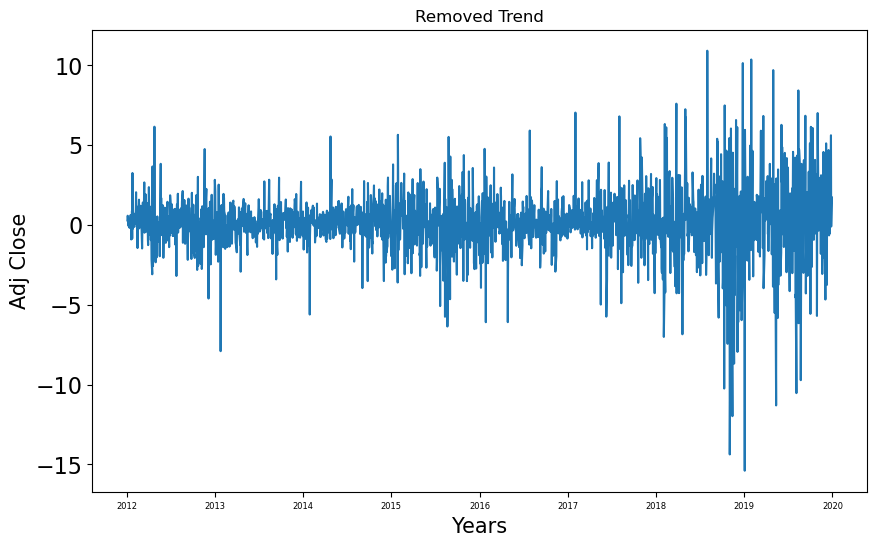

In [42]:
plt.figure(figsize=(10, 6))
plt.plot(df[' Adj Close First Difference'])
plt.xlabel('Years')
plt.ylabel('Adj Close')
plt.title('Removed Trend')
plt.show()

After First Differencing Trend has been removed 

In [44]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

In [45]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = plot_acf(df[' Adj Close First Difference'].iloc[2:],lags=30,ax=ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(df[' Adj Close First Difference'].iloc[2:],lags=30,ax=ax2)

From the above plot we can see that,the ACF & PACF plot start with a lag zero(0) which is the correlation of the time series with itself & therefore results in correlation of 1 .

You can see that a blue area in the ACF & PACF plots indicate the 95% confidence interval & Is an indicator of the significant threshold.

From the plot we choose p=1 & q=1

## 6. Train/Test Split

In [48]:
# Split data into train and test
df_train=df.iloc[:1760]   
df_test=df.iloc[1760:] 

## 7. Model Building

### XG Boost

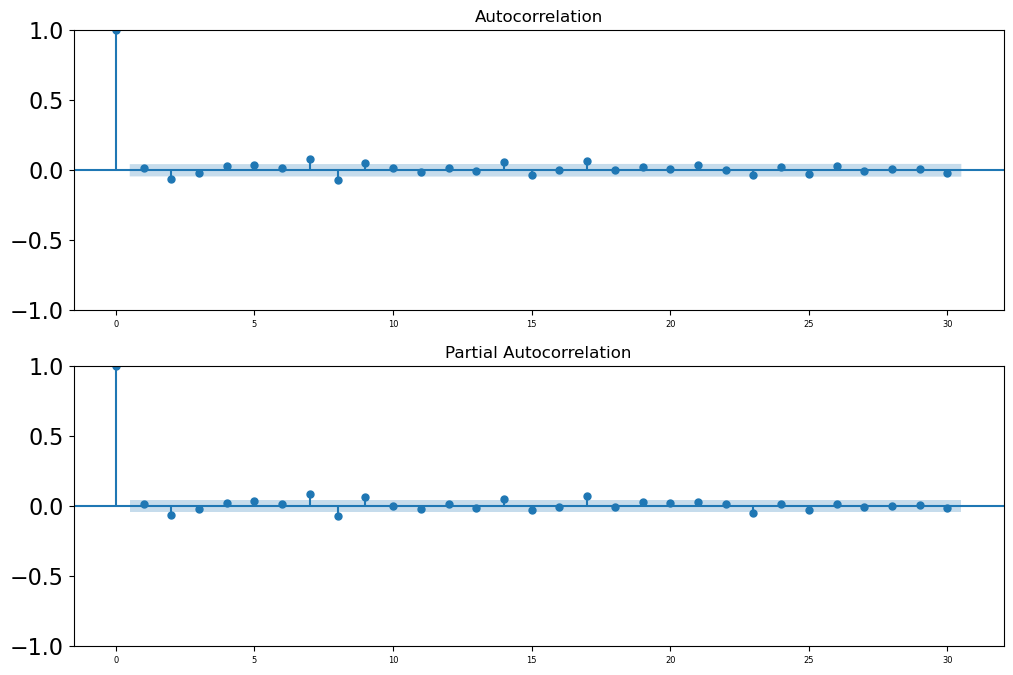

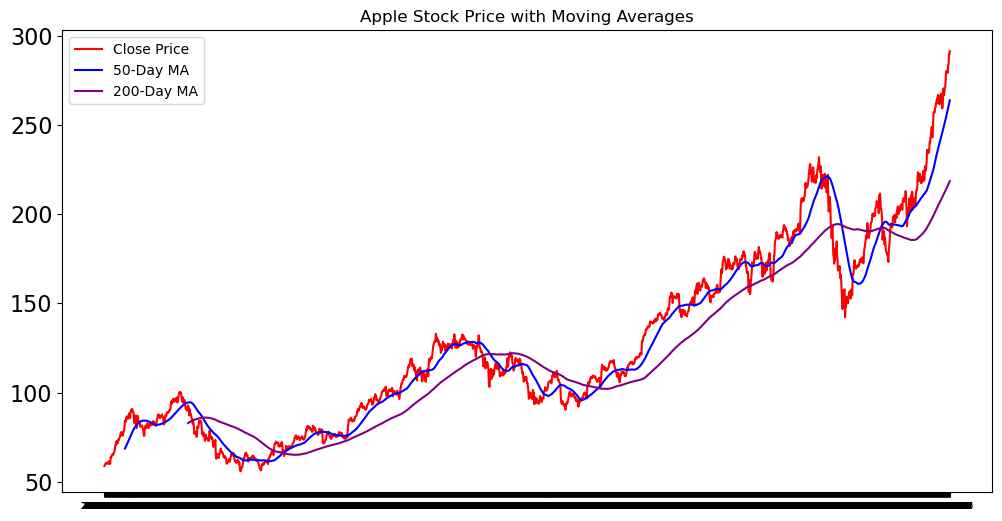

In [51]:
# Creating a 'Daily Return' column
df_cleaned['Daily_Return'] = df_cleaned['Close'].pct_change()

# Creating a '50-day Moving Average' and '200-day Moving Average'
df_cleaned['50_MA'] = df_cleaned['Close'].rolling(window=50).mean()
df_cleaned['200_MA'] = df_cleaned['Close'].rolling(window=200).mean()

# Visualizing Moving Averages
plt.figure(figsize=(12, 6))
plt.plot(df_cleaned['Date'], df_cleaned['Close'], label='Close Price', color='red')
plt.plot(df_cleaned['Date'], df_cleaned['50_MA'], label='50-Day MA', color='blue')
plt.plot(df_cleaned['Date'], df_cleaned['200_MA'], label='200-Day MA', color='purple')
plt.title('Apple Stock Price with Moving Averages')
plt.legend()
plt.show()

###  Modeling: Predicting Future Prices

In [53]:
# Selecting features for prediction (Close, 50_MA, 200_MA)
features = ['50_MA', '200_MA']
target = 'Close'



In [54]:
# Importing essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings("ignore")

# Removing NaN values introduced by the moving averages
df_model = df_cleaned.dropna()

# Splitting the data into train and test sets
X = df_model[features]
y = df_model[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Training a linear regression model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Predicting on test data
y_pred = model.predict(X_test_scaled)

### Evaluating the Model using XGOOST , RMSE and R²
*XGBoost is a high-performance machine learning algorithm that improves prediction accuracy by sequentially building and optimizing decision trees to correct errors in previous models.*

*RMSE gives you an idea of the magnitude of the prediction errors.

R² tells you how well your predictions match the actual data (with 1.0 being a perfect fit).*

In [56]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Initialize the XGBoost model
xgb_model = XGBRegressor()

# Train the XGBoost model
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred = xgb_model.predict(X_test)

# Calculate RMSE and R²
rmse = np.sqrt(mean_squared_error(y_test, y_pred))  # Manual square root
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse}")
print(f"R²: {r2}")


RMSE: 2.9128138840745987
R²: 0.9967758794958307


### 7.1 ARIMA Model

In [58]:
from statsmodels.tsa.arima_model import ARIMA

In [59]:
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

In [60]:
model = sm.tsa.arima.ARIMA(df_train['Adj Close'], order=(1,1,1))
model_fit = model.fit()

In [61]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:              Adj Close   No. Observations:                 1760
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -3586.498
Date:                Sun, 22 Jun 2025   AIC                           7178.995
Time:                        22:06:20   BIC                           7195.413
Sample:                    01-03-2012   HQIC                          7185.063
                         - 01-22-2019                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8404      0.104     -8.119      0.000      -1.043      -0.638
ma.L1          0.8682      0.097      8.939      0.000       0.678       1.059
sigma2         3.4556      0.051     68.164      0.000       3.356       3.555
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              6558.14
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               4.56   Skew:                            -0.74
Prob(H) (two-sided):                  0.00   Kurtosis:                        12.34
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

From the above analysis, we can see that the P-value of ar.L1 model & ma.L1 model is 0.00 which is less than 0.05, that mean's our data has highly significant

In [63]:
df['forecast']=model_fit.predict(start=1760,end=1994)

df[['Adj Close','forecast']].plot(figsize=(12,8))

<Axes: xlabel='Date'>

In [64]:
df[['Adj Close','forecast']].iloc[1760:]

,Adj Close,forecast
Date,,
2019-01-23,150.602600,149.787781
2019-01-24,149.408875,149.962731
2019-01-25,154.359848,149.815703
2019-01-28,152.931305,149.939266
2019-01-29,151.346207,149.835424
...,...,...
2019-12-23,282.054138,149.882842
2019-12-24,282.322266,149.882842
2019-12-26,287.923645,149.882842


In [65]:
#Mean Absolute Percentage Error (MAPE) - ARIMA
mape1 = np.mean(np.abs(df['forecast'] - df['Adj Close'])/np.abs(df['Adj Close']))
mape1

np.float64(0.26374136638963713)

In [66]:
#Root Mean Squared Error (RMSE) - ARIMA
rmse1 = np.mean((df['forecast'] - df['Adj Close'])**2)**.5 
rmse1

np.float64(66.82204794662974)

### 7.2 SARIMA Model(Monthly)

In [68]:
model1=sm.tsa.statespace.SARIMAX(df_train['Adj Close'], order=(1,1,1),seasonal_order=(1,1,1,30))
model1_fit=model1.fit()

In [69]:
model1_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                          Adj Close   No. Observations:                 1760
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 30)   Log Likelihood               -3591.005
Date:                            Sun, 22 Jun 2025   AIC                           7192.011
Time:                                    22:06:33   BIC                           7219.287
Sample:                                01-03-2012   HQIC                          7202.100
                                     - 01-22-2019                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3737     66.983      0.006      0.996    -130.910     131.657
ma.L1         -0.3738     66.978     -0.006      0.996    -131.649     130.901
ar.S.L30      -0.0657      0.020     -3.273      0.001      -0.105      -0.026
ma.S.L30      -0.9649      0.013    -76.082      0.000      -0.990      -0.940
sigma2         3.5524      0.058     61.261      0.000       3.439       3.666
===================================================================================
Ljung-Box (L1) (Q):                   0.98   Jarque-Bera (JB):              5925.05
Prob(Q):                              0.32   Prob(JB):                         0.00
Heteroskedasticity (H):               4.66   Skew:                            -0.74
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.95
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [70]:
df['forecast1']=model1_fit.predict(start=1760,end=1994,dynamic=True,exog=None)
df[['Adj Close','forecast1']].plot(figsize=(12,8))

<Axes: xlabel='Date'>

In [71]:
df0 = df[['Adj Close','forecast1']].iloc[1760:]


In [72]:
#Mean Absolute Percentage Error (MAPE) - ARIMA
mape2 = np.mean(np.abs(df0['forecast1'] - df0['Adj Close'])/np.abs(df0['Adj Close']))
mape2

np.float64(0.23450258280984498)

In [73]:
#Root Mean Squared Error (RMSE) - ARIMA
rmse2 = np.mean((df0['forecast1'] - df0['Adj Close'])**2)**.5 
rmse2

np.float64(59.951730238991104)

### 7.3 SARIMA Model(Quaterly)

In [75]:
model2=sm.tsa.statespace.SARIMAX(df_train['Adj Close'], order=(1,1,1),seasonal_order=(1,1,1,63))
model2_fit=model2.fit()

In [76]:
model2_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                          Adj Close   No. Observations:                 1760
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 63)   Log Likelihood               -3551.859
Date:                            Sun, 22 Jun 2025   AIC                           7113.718
Time:                                    22:07:33   BIC                           7140.898
Sample:                                01-03-2012   HQIC                          7123.781
                                     - 01-22-2019                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9496      0.038    -25.007      0.000      -1.024      -0.875
ma.L1          0.9643      0.033     29.421      0.000       0.900       1.029
ar.S.L63      -0.0531      0.029     -1.848      0.065      -0.109       0.003
ma.S.L63      -0.8688      0.019    -45.077      0.000      -0.907      -0.831
sigma2         3.6510      0.056     65.111      0.000       3.541       3.761
===================================================================================
Ljung-Box (L1) (Q):                   0.09   Jarque-Bera (JB):              5674.61
Prob(Q):                              0.77   Prob(JB):                         0.00
Heteroskedasticity (H):               4.70   Skew:                            -0.82
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.81
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [77]:
df['forecast2']=model2_fit.predict(start=1760,end=1994,dynamic=True,exog=None)
df[['Adj Close','forecast2']].plot(figsize=(12,8))

<Axes: xlabel='Date'>

In [78]:
df1 = df[['Adj Close','forecast1','forecast2']].iloc[1760:]
df1

,Adj Close,forecast1,forecast2
Date,,,
2019-01-23,150.602600,150.043221,149.563206
2019-01-24,149.408875,149.936626,149.338770
2019-01-25,154.359848,150.190061,149.024367
2019-01-28,152.931305,150.199146,148.984239
2019-01-29,151.346207,150.372433,148.311939
...,...,...,...
2019-12-23,282.054138,160.715997,157.696467
2019-12-24,282.322266,160.369341,157.022083
2019-12-26,287.923645,160.500467,156.377380


In [79]:
#Mean Absolute Percentage Error (MAPE) - ARIMA
mape3 = np.mean(np.abs(df1['forecast2'] - df1['Adj Close'])/np.abs(df1['Adj Close']))
mape3

np.float64(0.2355776244295463)

In [80]:
rmse3 = np.mean((df1['forecast2'] - df1['Adj Close'])**2)**.5 
rmse3

np.float64(60.822064649401234)

In [81]:
data1 = {'Models':['ARIMA','SARIMA(Monthly)',
                   'SARIMA(Qauterly)',
                   ],
       'Root Mean Squared Error':[rmse1,rmse2,rmse3]}
Model = pd.DataFrame(data1)
Model = Model.sort_values('Root Mean Squared Error').reset_index(drop=True)
Model

,Models,Root Mean Squared Error
0,SARIMA(Monthly),59.951730
1,SARIMA(Qauterly),60.822065
2,ARIMA,66.822048


SARIMA monthly model has better RMSE score comparison to other

### 7.4 Selected SARIMA Model

In [84]:
#Training Model with all data
model3=sm.tsa.statespace.SARIMAX(df['Adj Close'], order=(1,1,1),seasonal_order=(1,1,1,30))
model3_fit=model3.fit()

In [85]:
model3_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                          Adj Close   No. Observations:                 1995
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 30)   Log Likelihood               -4255.959
Date:                            Sun, 22 Jun 2025   AIC                           8521.918
Time:                                    22:07:57   BIC                           8549.831
Sample:                                01-03-2012   HQIC                          8532.176
                                     - 12-30-2019                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5276      1.127      0.468      0.640      -1.681       2.736
ma.L1         -0.5366      1.120     -0.479      0.632      -2.732       1.659
ar.S.L30      -0.0205      0.020     -1.021      0.307      -0.060       0.019
ma.S.L30      -0.9724      0.011    -88.592      0.000      -0.994      -0.951
sigma2         4.2692      0.069     61.433      0.000       4.133       4.405
===================================================================================
Ljung-Box (L1) (Q):                   1.15   Jarque-Bera (JB):              4203.12
Prob(Q):                              0.28   Prob(JB):                         0.00
Heteroskedasticity (H):               6.38   Skew:                            -0.51
Prob(H) (two-sided):                  0.00   Kurtosis:                        10.10
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

#### Forcasting 30 Days Price

In [87]:
f = pd.DataFrame(model3_fit.forecast(30))
f

,predicted_mean
2019-12-31,289.449389
2020-01-02,289.762911
2020-01-03,290.064715
2020-01-06,289.945383
2020-01-07,289.743516
2020-01-08,289.412735
2020-01-09,289.689806
2020-01-10,290.542192
2020-01-13,290.533221
2020-01-14,290.802723


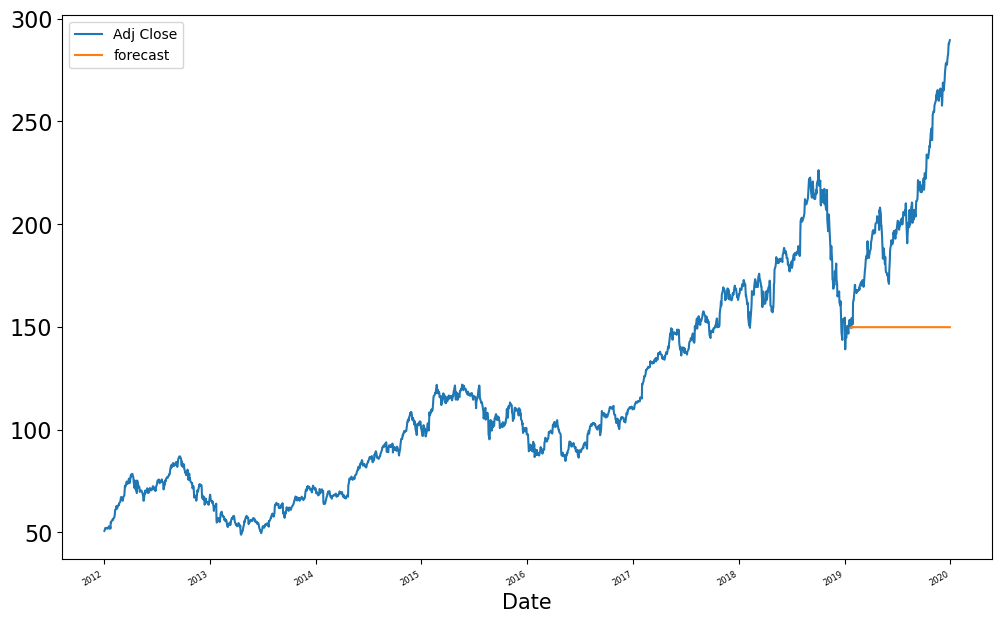

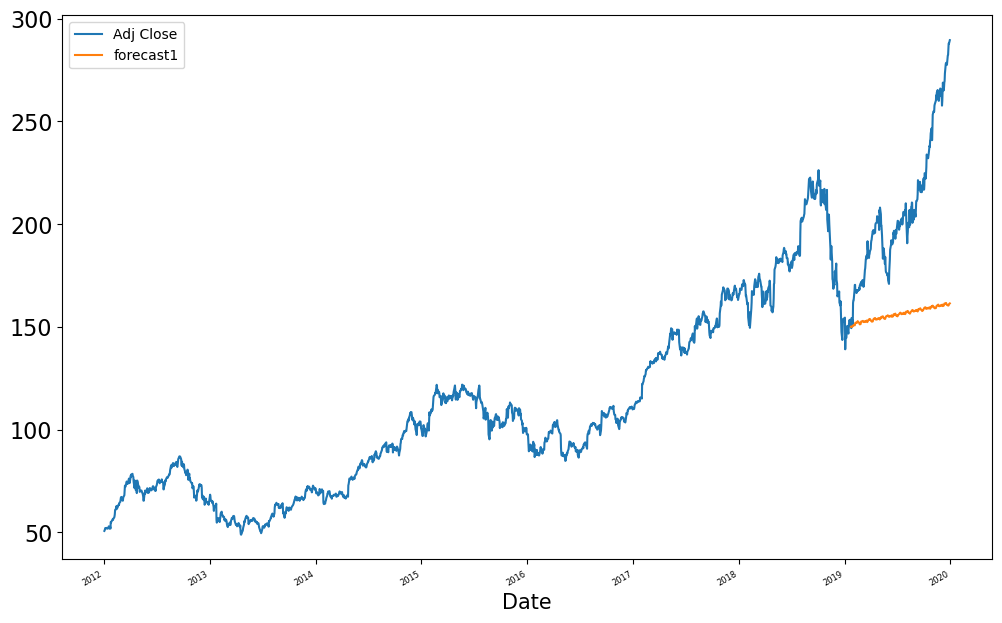

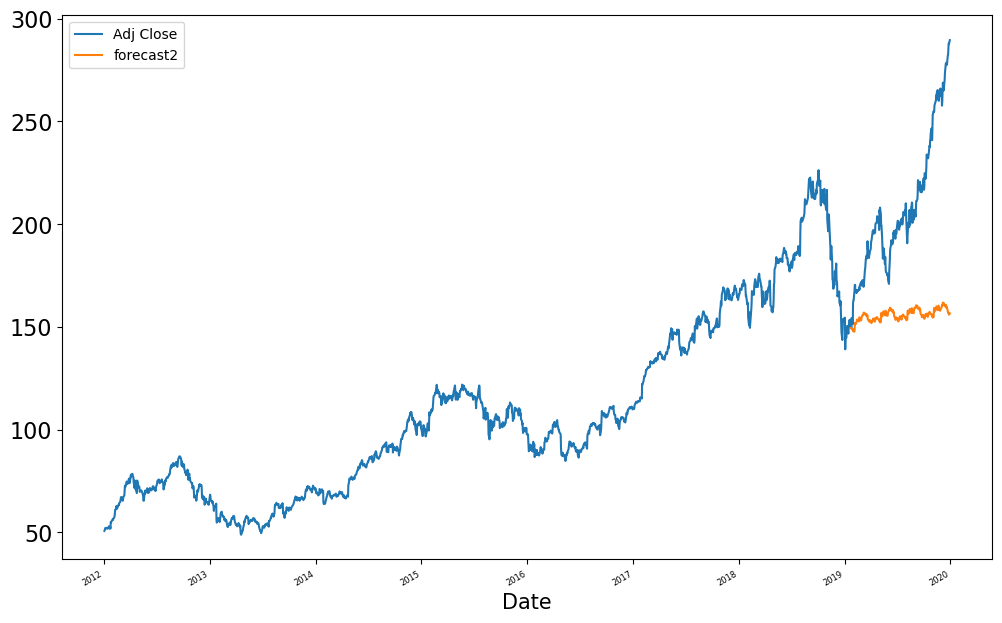

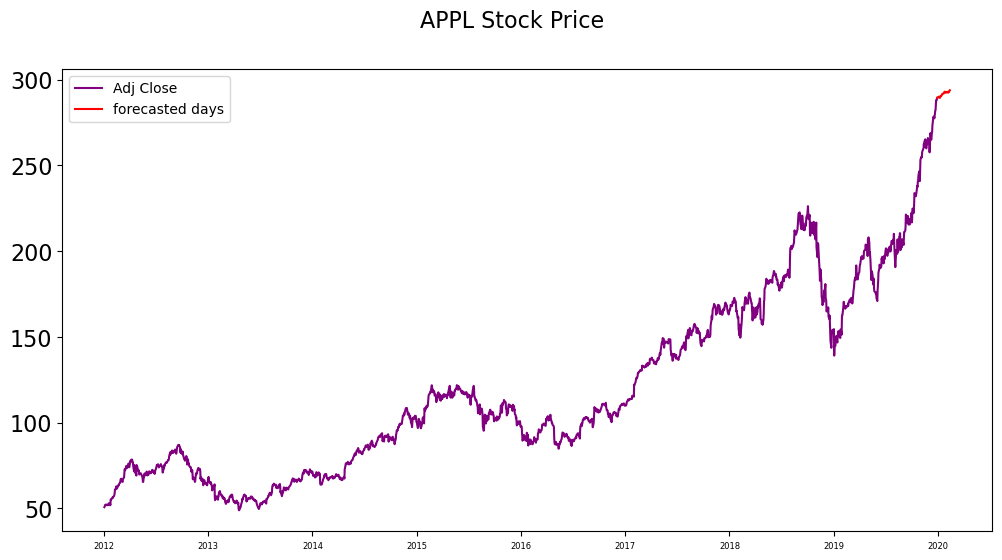

In [88]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize = (12,6))
ax.plot(df['Adj Close'],label='Adj Close',color='purple')
ax.plot(f,label='forecasted days',color='red')
plt.legend(loc='upper left', fontsize=10)
plt.suptitle('APPL Stock Price', fontsize=16)
plt.show()

## 8. Pickle File

### Saving best Performiin 

In [91]:
from pickle import dump
from pickle import load

In [92]:
filename = 'pickle_file_Apple.sav'
dump(model3_fit, open('pickle_file_Apple.sav', 'wb'))

In [93]:
loaded_model = load(open('pickle_file_Apple.sav', 'rb'))
fct = pd.DataFrame(loaded_model.forecast(30))
fct

,predicted_mean
2019-12-31,289.449389
2020-01-02,289.762911
2020-01-03,290.064715
2020-01-06,289.945383
2020-01-07,289.743516
2020-01-08,289.412735
2020-01-09,289.689806
2020-01-10,290.542192
2020-01-13,290.533221
2020-01-14,290.802723


### APP.PY code

In [95]:
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pickle import dump, load
import os

# Page title
st.title("Apple Stock Price Forecasting using SARIMA")

# Upload CSV
uploaded_file = st.file_uploader("Upload your stock CSV file with 'Adj Close' column", type=['csv'])

if uploaded_file is not None:
    df = pd.read_csv(uploaded_file, parse_dates=True, index_col=0)

    st.write("### Data Preview")
    st.write(df.tail())

    # Forecast horizon slider
    forecast_days = st.slider("Select number of days to forecast", min_value=7, max_value=60, value=30)

    # Train the model
    st.write("### Training SARIMA Model...")
    model3 = SARIMAX(df['Adj Close'], order=(1,1,1), seasonal_order=(1,1,1,30))
    model3_fit = model3.fit(disp=False)

    # Forecast next N days
    forecast = model3_fit.forecast(forecast_days)

    st.write(f"### Forecasted Prices (Next {forecast_days} Days)")
    st.write(forecast)

    # Plot the data
    st.write("### Forecast Plot")
    fig, ax = plt.subplots(figsize=(12,6))
    ax.plot(df['Adj Close'], label='Adj Close', color='purple')
    ax.plot(pd.date_range(df.index[-1], periods=forecast_days+1, freq='D')[1:], forecast, label='Forecasted', color='red')
    ax.legend(loc='upper left')
    plt.title(f'AAPL Stock Price Forecast - Next {forecast_days} Days')
    st.pyplot(fig)

    # Save the model
    if st.button("Save Model to Pickle"):
        dump(model3_fit, open('pickle_file_Apple.sav', 'wb'))
        st.success("Model saved successfully as pickle_file_Apple.sav")

    # Load the model and show prediction
    if os.path.exists('pickle_file_Apple.sav'):
        if st.button("Load Pickle Model and Forecast Again"):
            loaded_model = load(open('pickle_file_Apple.sav', 'rb'))
            fct = loaded_model.forecast(forecast_days)
            st.write(f"Forecast from Pickle Model ({forecast_days} Days):")
            st.write(fct)


2025-06-22 22:08:04.428 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-22 22:08:05.621 
  command:

    streamlit run C:\Users\User\anaconda3\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
2025-06-22 22:08:05.621 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-22 22:08:05.623 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-22 22:08:05.623 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-22 22:08:05.623 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-22 22:08:05.625 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-22 22:08:05.626 Thread 'MainThread': mis